## Imports

In [61]:
# imports
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

## Data Import

In [27]:
# Original data
DATA_DIR = r"data"
DATA_FILEPATH = os.path.join(DATA_DIR, "data.csv")
df = pd.read_csv(DATA_FILEPATH)
print(df.head())

                       timestamp               department            room  \
0     2023-11-08 08:12:03.787+00  מיון כירורגיה - מ.הלכים         חדר הלם   
1     2023-11-08 08:12:03.787+00               מיון פנימי  מיון קורונה ב`   
2  2024-03-18 10:08:57.218644+00                        A            A104   
3  2024-03-18 10:08:58.083959+00                        A            A104   
4  2024-03-18 13:54:53.606752+00               טראומה חדש              T5   

     requirement     status  
0     רמת דחיפות          4  
1     רמת דחיפות          3  
2   ניקיון تنظيف  satisfied  
3   ניקיון تنظيف   required  
4  כח עזר - אוכל  satisfied  


## Clean timestamp column

In [28]:
processed = df.copy()
processed['timestamp'] = pd.to_datetime(df['timestamp'], utc=True, format='mixed')
processed['clean_timestamp'] = processed['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S') #Without utc and microseconds

In [29]:
print(processed['clean_timestamp'].head())
print(processed['clean_timestamp'].tail())

0    2023-11-08 08:12:03
1    2023-11-08 08:12:03
2    2024-03-18 10:08:57
3    2024-03-18 10:08:58
4    2024-03-18 13:54:53
Name: clean_timestamp, dtype: object
463892    2025-01-23 10:07:21
463893    2025-01-23 10:10:50
463894    2025-01-23 10:14:00
463895    2025-01-23 10:14:00
463896    2025-01-23 10:14:01
Name: clean_timestamp, dtype: object


In [30]:
# Create date and time columns
processed['clean_timestamp'] = pd.to_datetime(processed['clean_timestamp'])
processed['date'] = processed['clean_timestamp'].dt.date
processed['time'] = processed['clean_timestamp'].dt.time
print(processed['time'].head())
print(processed['date'].head())

0    08:12:03
1    08:12:03
2    10:08:57
3    10:08:58
4    13:54:53
Name: time, dtype: object
0    2023-11-08
1    2023-11-08
2    2024-03-18
3    2024-03-18
4    2024-03-18
Name: date, dtype: object


In [31]:
# Remove old columns
processed = processed.drop(columns=['clean_timestamp', 'timestamp'], axis=1)

In [32]:
processed

,department,room,requirement,status,date,time
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53
...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00
463895,A,A104,תפוס,required,2025-01-23,10:14:00


In [33]:
# Convert to datetime
processed['date'] = pd.to_datetime(processed['date'])

In [34]:
processed

,department,room,requirement,status,date,time
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53
...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00
463895,A,A104,תפוס,required,2025-01-23,10:14:00


In [35]:
# Extract year, month, day
processed['day'] = processed['date'].dt.day
processed['month'] = processed['date'].dt.month
processed['year'] = processed['date'].dt.year

In [36]:
processed

,department,room,requirement,status,date,time,day,month,year
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03,8,11,2023
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03,8,11,2023
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57,18,3,2024
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58,18,3,2024
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53,18,3,2024
...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21,23,1,2025
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50,23,1,2025
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00,23,1,2025
463895,A,A104,תפוס,required,2025-01-23,10:14:00,23,1,2025


In [37]:
# Extract hour, minute and seconds
processed['time'] = pd.to_datetime(processed['time'], format='%H:%M:%S').dt.time
processed['hours'] =  processed['time'].apply(lambda x: x.hour)
processed['minutes'] = processed['time'].apply(lambda x: x.minute)
processed['seconds'] = processed['time'].apply(lambda x: x.second)

In [38]:
processed

,department,room,requirement,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,A104,תפוס,required,2025-01-23,10:14:00,23,1,2025,10,14,0


# Label Encoding for Requirements Column

In [39]:
processed['requirement'].unique()

array(['רמת דחיפות', 'ניקיון تنظيف', 'כח עזר - אוכל', 'כח עזר - שונות',
       'צר"פ', 'כביסה', 'כח עזר - סיוע למטופל', 'תפוס', 'בדיקת דם',
       'בדיקת אק"ג', 'יעוץ', 'נקיון - החלפת פרגוד', 'נקיון - בידוד',
       'בדיקת רופא'], dtype=object)

In [40]:
# Label Encoding
encoder = LabelEncoder()
processed['requirements_category'] = encoder.fit_transform(processed['requirement'])

In [41]:
# Label mapping
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nCategory to Label Mapping:")
print(category_mapping)


Category to Label Mapping:
{'בדיקת אק"ג': 0, 'בדיקת דם': 1, 'בדיקת רופא': 2, 'יעוץ': 3, 'כביסה': 4, 'כח עזר - אוכל': 5, 'כח עזר - סיוע למטופל': 6, 'כח עזר - שונות': 7, 'ניקיון تنظيف': 8, 'נקיון - בידוד': 9, 'נקיון - החלפת פרגוד': 10, 'צר"פ': 11, 'רמת דחיפות': 12, 'תפוס': 13}


In [42]:
# Move new column next to requirements column
cols = list(processed.columns)
cols.remove('requirements_category')  # Remove column 'C'
cols.insert(3, 'requirements_category')  # Insert column 'C' after 'A'
processed = processed[cols]
processed

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,A104,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,A104,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,T5,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,C316,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,A104,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,A104,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0


# Time catagorization

In [43]:
def categorize_time(time):
    hour = time.hour
    if 7 <= hour < 15:
        return 0
    elif 15 <= hour < 21:
        return 1
    else:
        return 2

processed['Part_of_Day'] = processed['time'].apply(categorize_time)

C:\Users\rotem\AppData\Local\Temp\ipykernel_6688\620758523.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['Part_of_Day'] = processed['time'].apply(categorize_time)


In [44]:
processed

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds,Part_of_Day
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3,0
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3,0
2,A,A104,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57,0
3,A,A104,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58,0
4,טראומה חדש,T5,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21,0
463893,C,C316,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50,0
463894,A,A104,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0,0
463895,A,A104,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0,0


# Rooms Encoding

In [45]:
# Label Encoding
encoder = LabelEncoder()
processed['room'] = encoder.fit_transform(processed['room'])
# Label mapping
room_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nRooms to Label Mapping:")
print(room_mapping)


Rooms to Label Mapping:
{' ': 0, '1': 1, '10': 2, '101': 3, '102': 4, '103': 5, '104': 6, '105': 7, '106': 8, '107': 9, '108': 10, '109': 11, '11': 12, '110': 13, '111': 14, '112': 15, '113': 16, '114': 17, '115': 18, '116': 19, '117': 20, '12': 21, '13': 22, '14': 23, '15': 24, '16': 25, '17': 26, '18': 27, '19': 28, '2': 29, '20': 30, '201': 31, '202': 32, '203': 33, '204': 34, '205': 35, '206': 36, '207': 37, '208': 38, '209': 39, '21': 40, '210': 41, '211': 42, '212': 43, '213': 44, '214': 45, '215': 46, '216': 47, '217': 48, '22': 49, '23': 50, '24': 51, '25': 52, '26': 53, '27': 54, '28': 55, '29': 56, '3': 57, '30': 58, '301': 59, '302': 60, '303': 61, '304': 62, '305': 63, '306': 64, '307': 65, '308': 66, '309': 67, '310': 68, '311': 69, '312': 70, '313': 71, '314': 72, '315': 73, '316': 74, '317': 75, '318': 76, '319': 77, '320': 78, '321': 79, '39': 80, '39-נשימתי': 81, '4': 82, '401': 83, '402': 84, '403': 85, '404-405': 86, '404/405': 87, '406': 88, '407': 89, '408': 90, '

C:\Users\rotem\AppData\Local\Temp\ipykernel_6688\471505616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['room'] = encoder.fit_transform(processed['room'])


In [46]:
processed

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds,Part_of_Day
0,מיון כירורגיה - מ.הלכים,215,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3,0
1,מיון פנימי,242,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3,0
2,A,132,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57,0
3,A,132,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58,0
4,טראומה חדש,191,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,142,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21,0
463893,C,178,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50,0
463894,A,132,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0,0
463895,A,132,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0,0


# Departments Encoding

In [47]:
# Label Encoding
encoder = LabelEncoder()
processed['department'] = encoder.fit_transform(processed['department'])
# Label mapping
department_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nDepartments to Label Mapping:")
print(department_mapping)


Departments to Label Mapping:
{'A': 0, 'A מלרד אגף': 1, 'B': 2, 'B מלרד אגף': 3, 'C': 4, 'C מלרד אגף': 5, 'D מלרד מהלכים': 6, 'דימות': 7, 'המחלקה לרפואה דחופה': 8, 'המחלקה לרפואה דחופה - לא פעיל': 9, 'חדר הלם': 10, 'חדר סמינרים': 11, 'חדר צוות': 12, 'טראומה חדש': 13, "טריאז' מיון חדש": 14, 'מחסן שוכבים': 15, 'מיון אורתופדי': 16, 'מיון אורתופדי - לא פעיל': 17, 'מיון כירורגי': 18, 'מיון כירורגי - לא פעיל': 19, 'מיון כירורגי ישן': 20, 'מיון כירורגיה - מ.הלכים': 21, 'מיון מהלכים': 22, 'מיון מהלכים - לא פעיל': 23, 'מיון פנימי': 24, 'מיון פנימי - לא פעיל': 25, 'מיון פנימי ישן': 26, 'מלר"ד אגף מהלכים': 27, 'מלרד טראומה': 28, 'מלרד טראומה בנין 16': 29, 'מלרד מהלכים': 30, 'מלרד מהלכים בנין 16': 31, 'משרד קבלה': 32}


C:\Users\rotem\AppData\Local\Temp\ipykernel_6688\695567420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['department'] = encoder.fit_transform(processed['department'])


In [53]:
processed

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds,Part_of_Day
2,0,132,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57,0
3,0,132,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58,0
4,13,191,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53,0
5,13,191,כח עזר - שונות,7,satisfied,2024-03-18,13:54:54,18,3,2024,13,54,54,0
6,13,192,"צר""פ",11,satisfied,2024-03-18,13:56:21,18,3,2024,13,56,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,0,142,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21,0
463893,4,178,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50,0
463894,0,132,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0,0
463895,0,132,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0,0


# Handle Clinical and Status Requirements

In [48]:
processed = processed[processed['requirements_category'] != 12]
processed_without_status = processed[processed['requirements_category'] != 13]

# Graphs

In [49]:
frequency_table = processed['Part_of_Day'].value_counts(normalize=True) * 100
frequency_table

Part_of_Day
0    38.348207
2    33.780444
1    27.871349
Name: proportion, dtype: float64

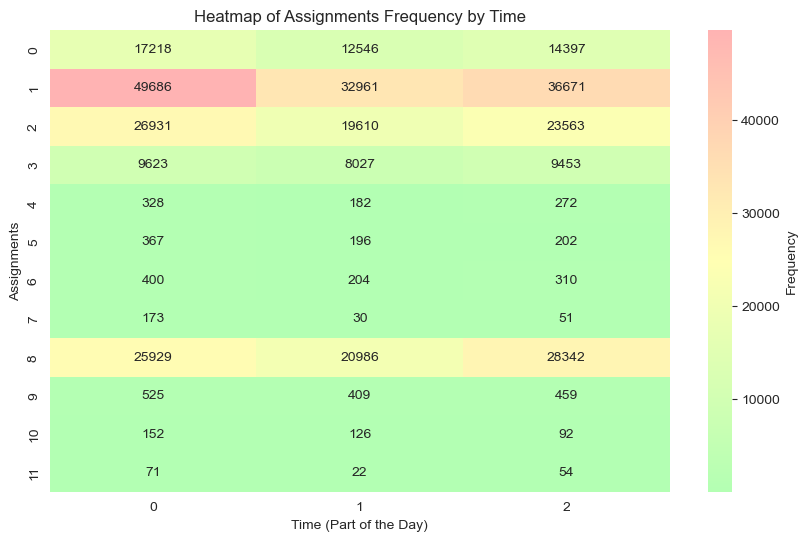

In [68]:
pivot_table = processed_without_status.pivot_table(index='requirements_category', columns='Part_of_Day', aggfunc='size', fill_value=0)
colors = ["#B3FFB3", "#FFFFB3", "#FFB3B3"]
cmap = LinearSegmentedColormap.from_list("red_yellow_green", colors, N=256)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap=cmap, annot=True, fmt="d", cbar_kws={'label': 'Frequency'})
plt.title("Heatmap of Assignments Frequency by Time")
plt.xlabel("Time (Part of the Day)")
plt.ylabel("Assignments")
plt.show()

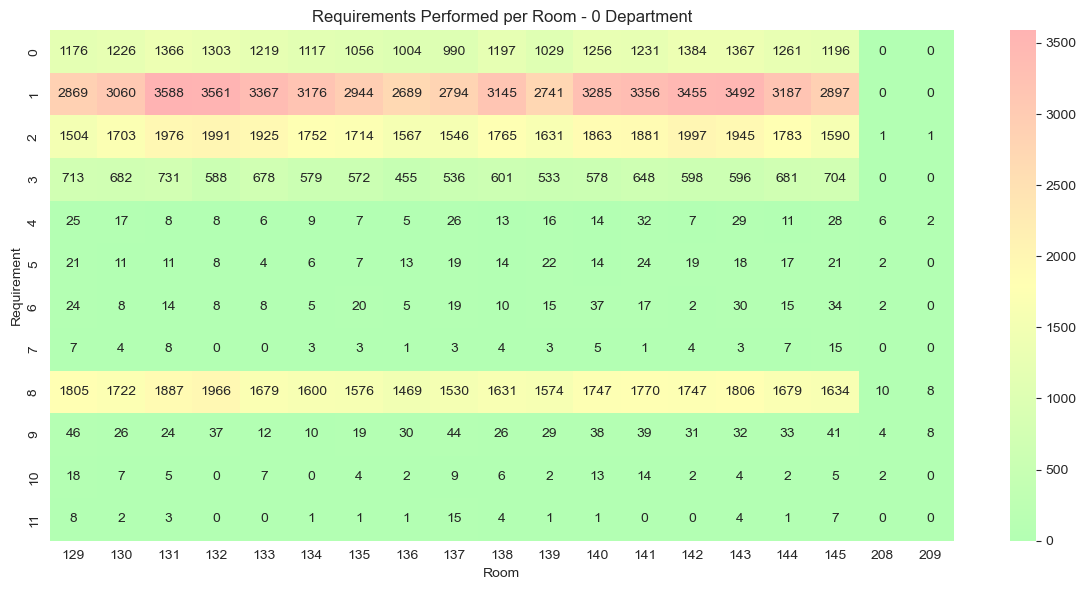

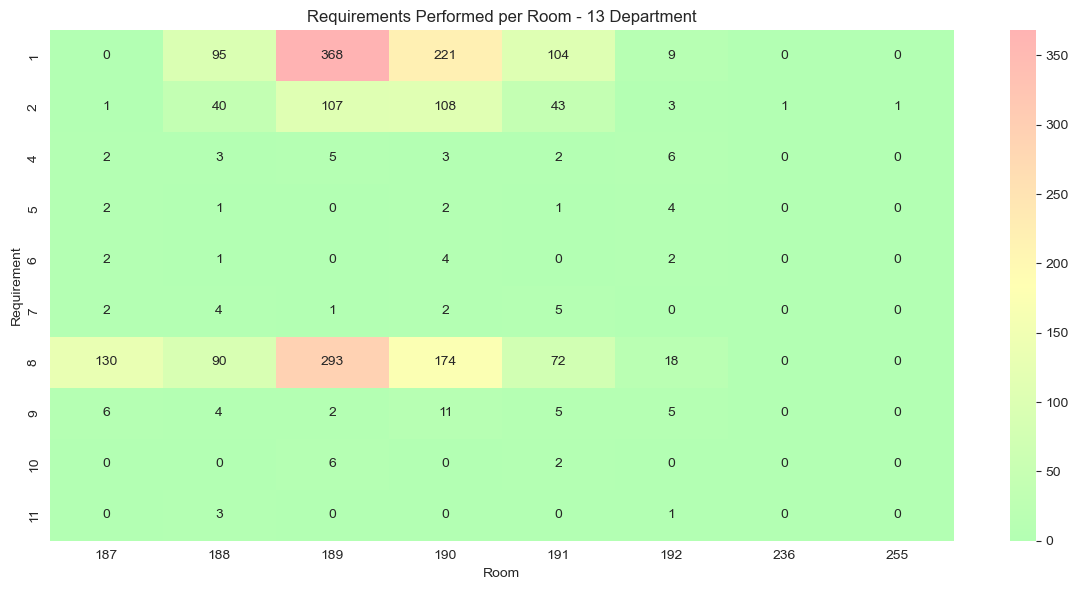

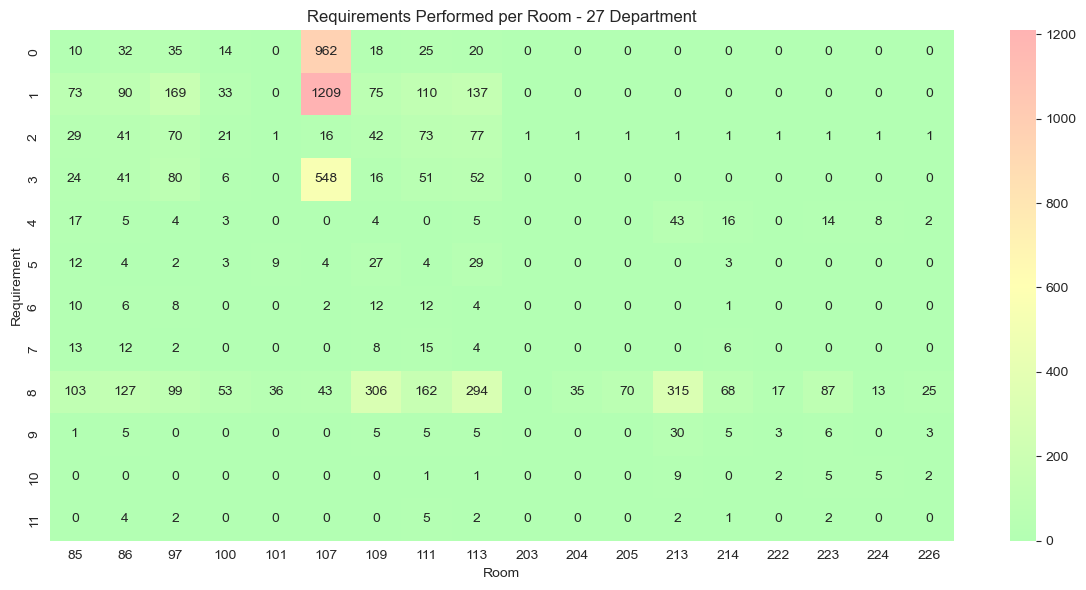

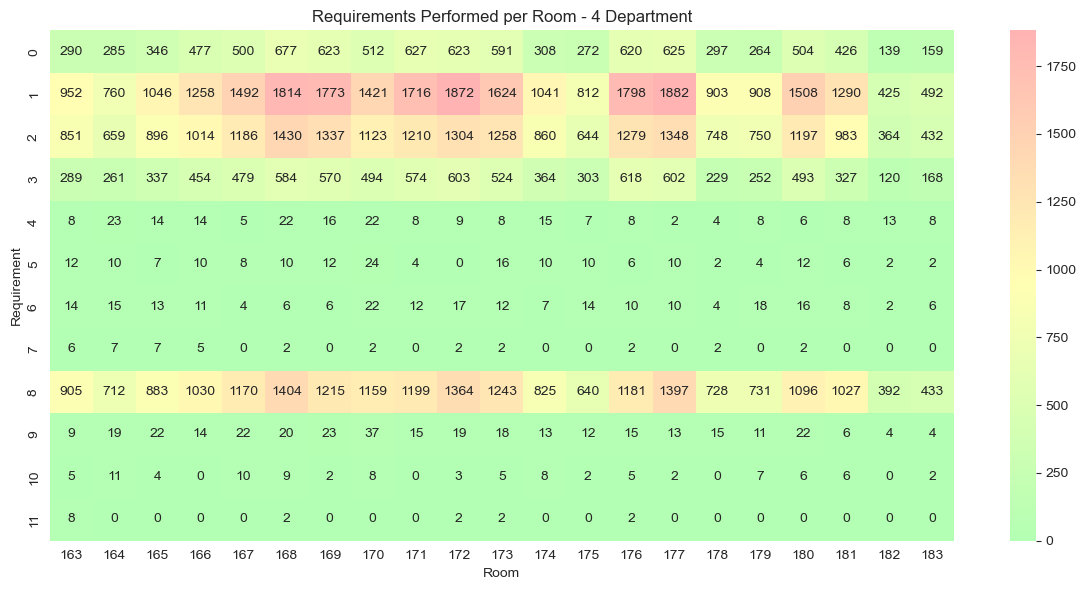

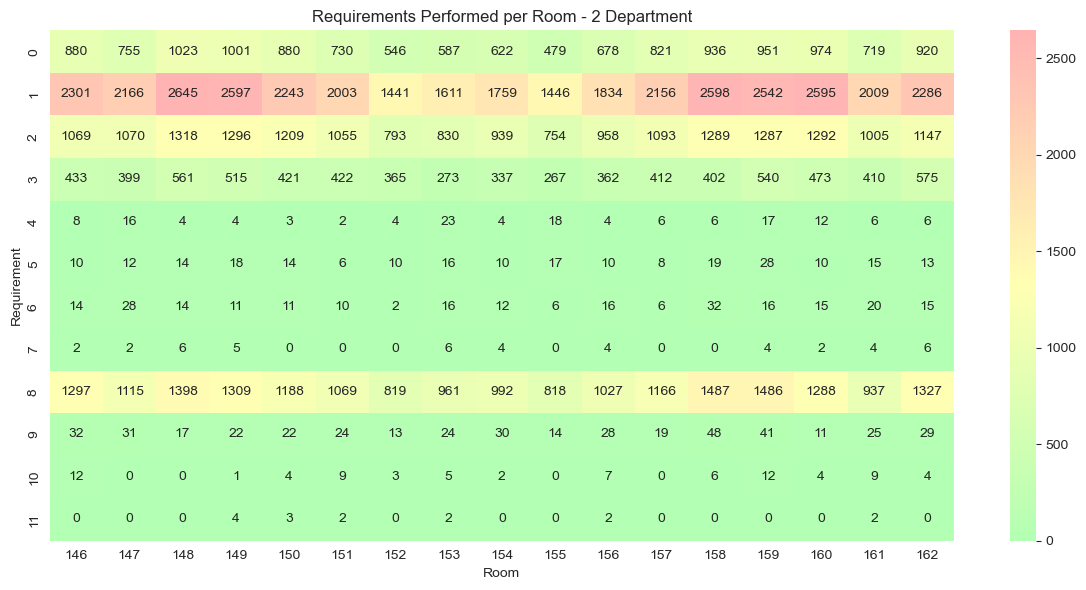

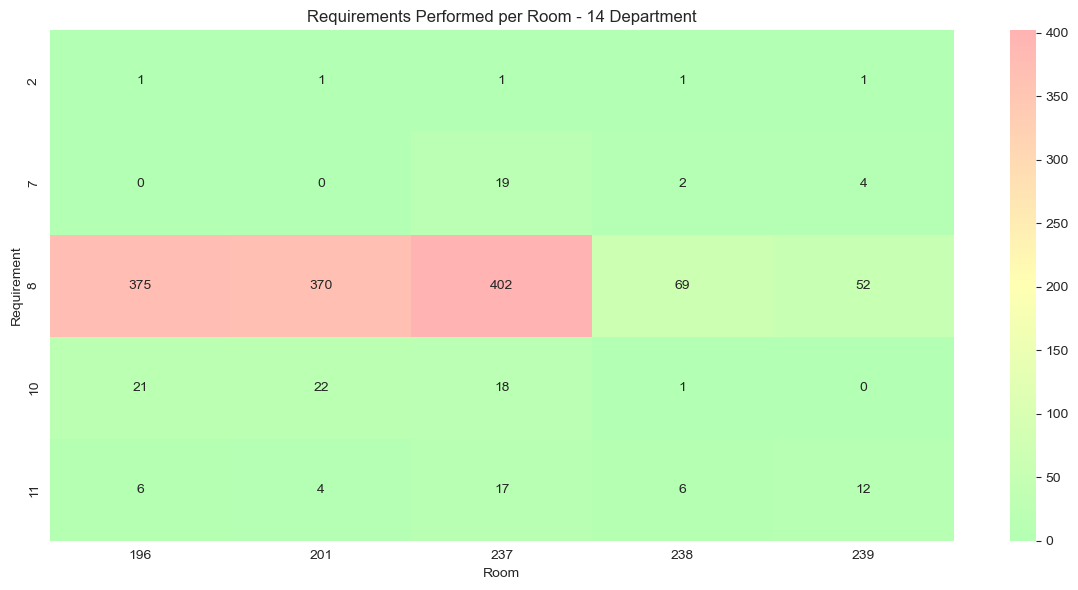

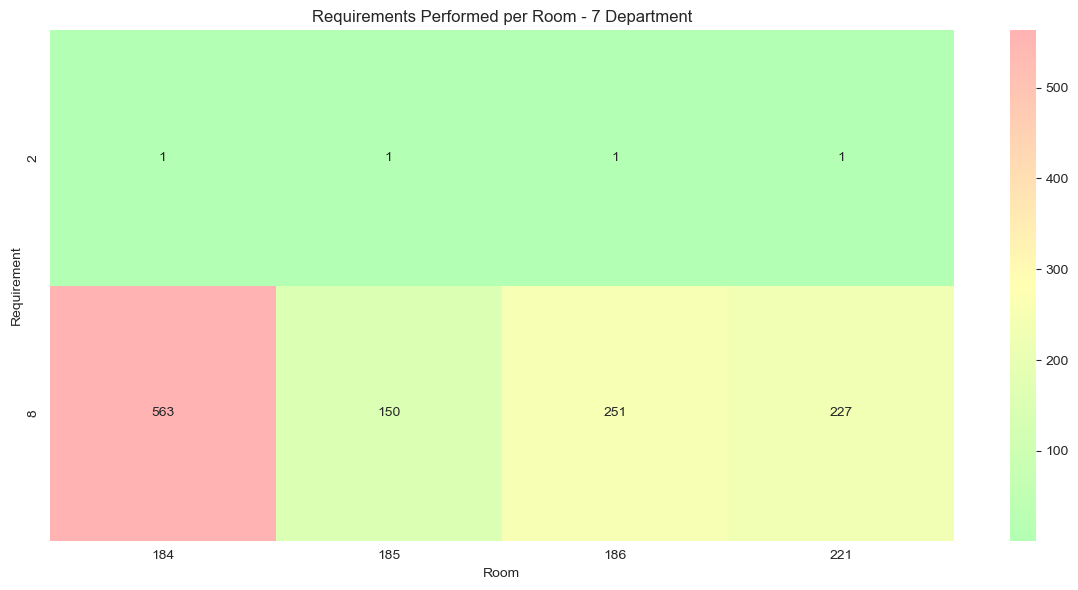

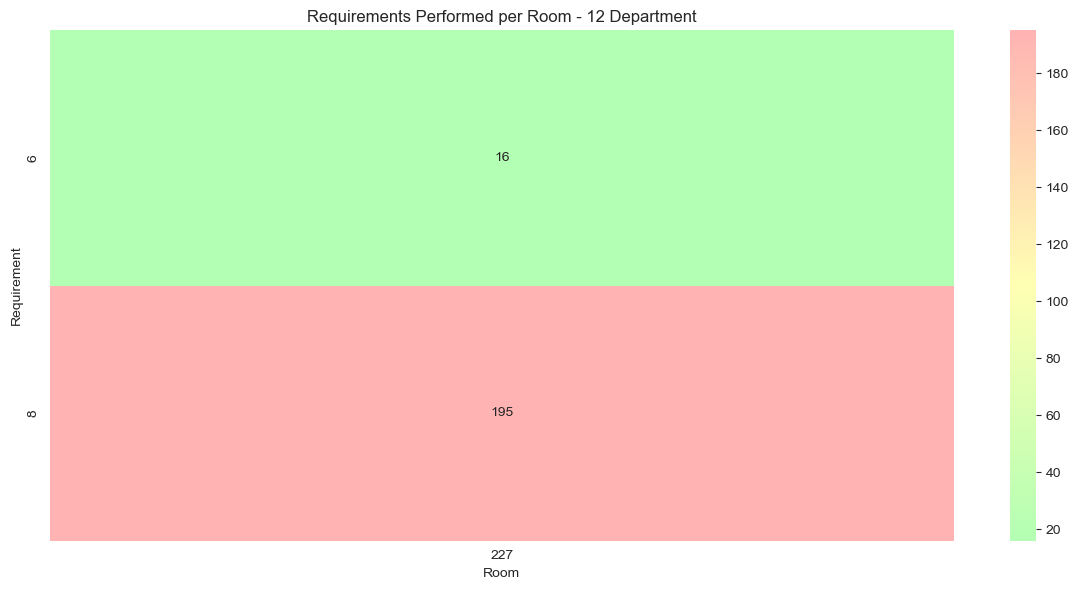

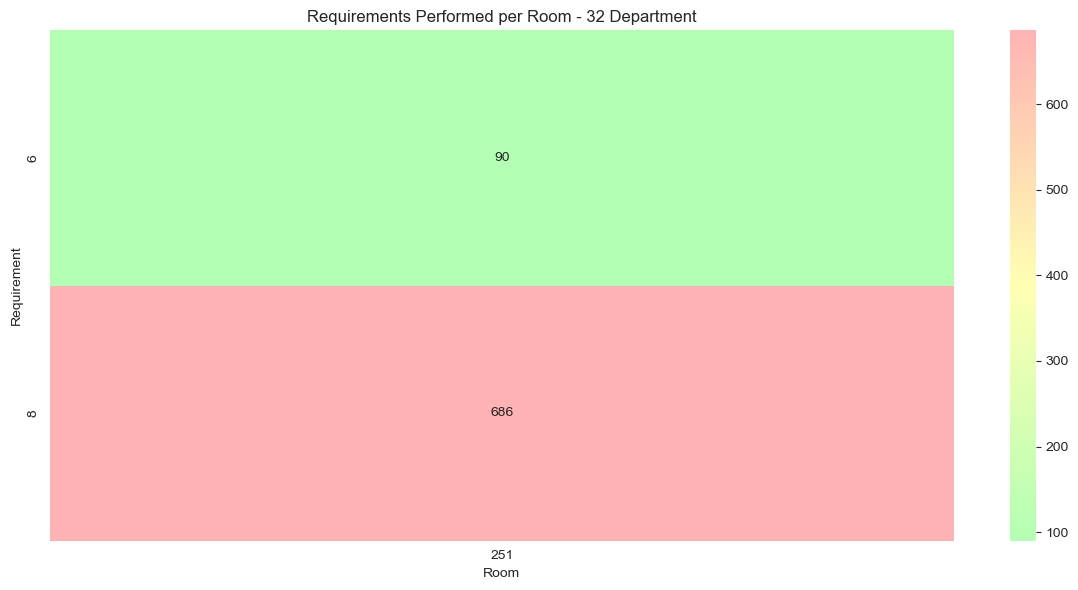

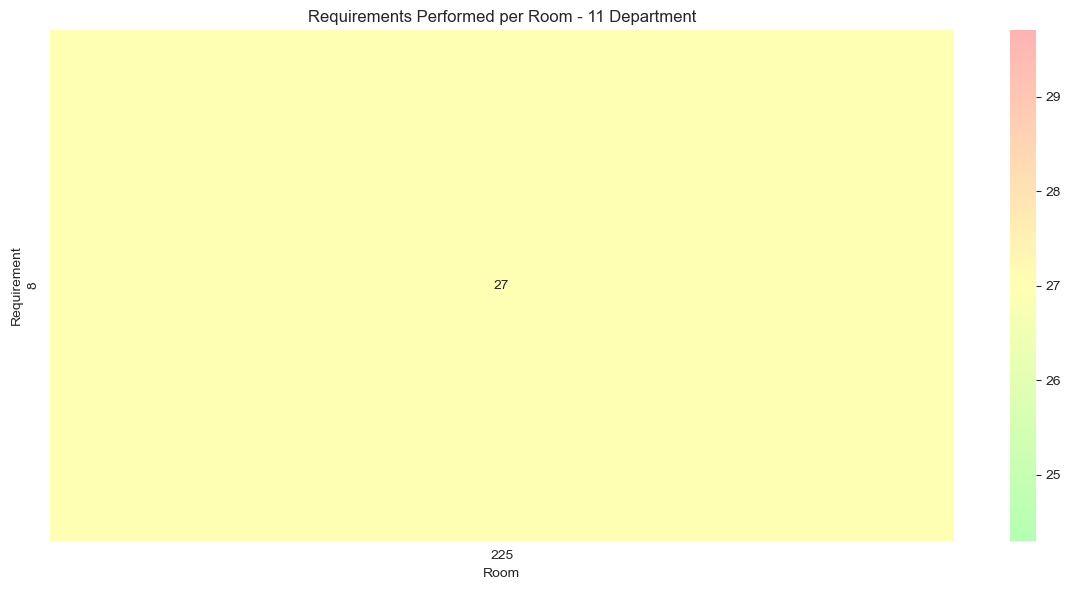

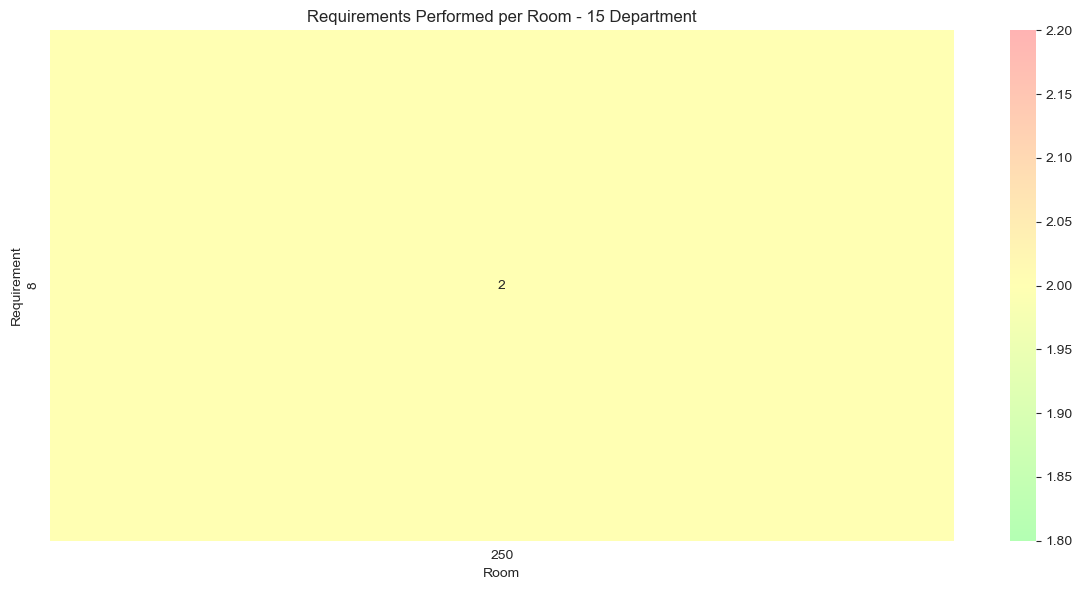

In [67]:
colors = ["#B3FFB3", "#FFFFB3", "#FFB3B3"]
cmap = LinearSegmentedColormap.from_list("red_yellow_green", colors, N=256)
for dept in processed_without_status['department'].unique():
    df_dept = processed_without_status[processed_without_status['department'] == dept]

    # Create pivot table for this department
    heatmap_data = df_dept.groupby(['room', 'requirements_category']).size().unstack(fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data.T, annot=True, cmap=cmap, fmt='d')

    plt.title(f"Requirements Performed per Room - {dept} Department")
    plt.xlabel('Room')
    plt.ylabel('Requirement')
    plt.tight_layout()
    plt.show()